In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import io as sio
from scipy.stats import zscore
import matplotlib.pyplot as plt
from os.path import join as pjoin
import mytools

In [2]:
root = r'C:\Users\jefma\Documents\1_KUL\BME3\dev'
dir_data = pjoin(root,r'qssr_dvc\data')
dir_figs = pjoin(root,r'qssr_thesis\figs')

## Basic overview of file structures etc

### Import signal recordings from prior work in Matlab via scipy.io

### Iterate over all available BVP recordings for inspection

In [3]:
select_file = pjoin(dir_data,r'1_BVP\adjusted_filenames')
matfile = sio.loadmat(select_file,squeeze_me=True)
filenames = matfile['filenames']

---
# Generate figures for thesis manuscript

1. Signal morphology
2. Annotation demos
3. feature extraction

## 1. Feature extraction - figures chapter 2

### 1.1 BVP
- PP30_EYE_PRE: prevalent peak separation (deep notch followed by secondary peak)
- PP08_EYE_POST: noisy segment, getting really hard to distinguish peaks 
- PP04_RS_POST: classic PPG, triangular waveform with mild notch

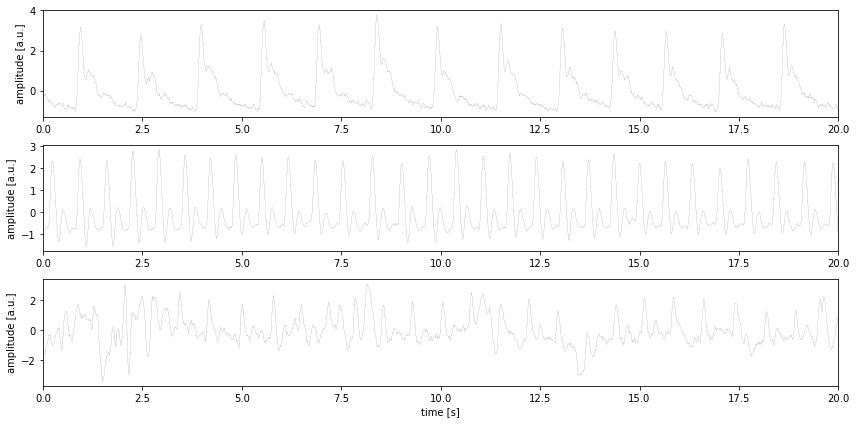

In [3]:
# fig:bvp_morph 

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,6))

t1,sig1,fs1 = mytools.get_bvp(pjoin(dir_data,r'1_BVP/rdeco_in/PP04_RS_POST'))
t2,sig2,fs2 = mytools.get_bvp(pjoin(dir_data,r'1_BVP/rdeco_in/PP30_EYE_PRE'))
t3,sig3,fs3 = mytools.get_bvp(pjoin(dir_data,r'1_BVP/rdeco_in/PP08_EYE_POST'))

# use T=20s segments
mytools.bvp_subplot(ax1,t1,sig1,fs1,20) # zscore applied by default
mytools.bvp_subplot(ax2,t2,sig2,fs2,20)
mytools.bvp_subplot(ax3,t3,sig3,fs3,20)
ax3.set_xlabel('time [s]')
plt.tight_layout()
plt.show

# save fig:bvp_morph to latex folder
figpath = dir_figs + r'\bvp\morph.pdf'
#plt.savefig(figpath,dpi=80)

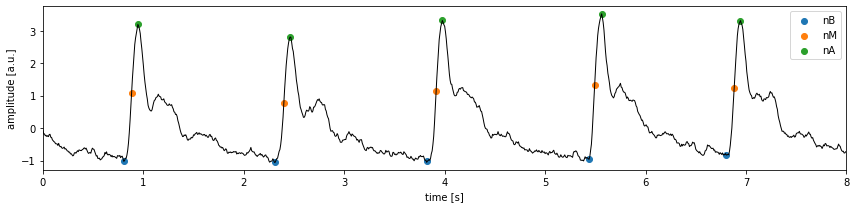

In [8]:
# fig:bvp_fids

T = 8 # [seconds]
mid = 'PP04_RS_POST'
fid_str = np.asarray(['vnB','vnM','vnA'])
select_path = pjoin(dir_data,r'1_BVP\valid_fids')

# collect sample signal (mid) and corresponding annotations
t,sig,fs = mytools.get_bvp(pjoin(dir_data,r'1_BVP\rdeco_in',mid))
fid_val = mytools.bvp_fids(select_path,mid,fid_str)

bvp = zscore(sig[0:T*fs])
t = t[0:T*fs]
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(t,bvp,lw=1,color='black')
ax.set_xlim(0,T)

for fid in fid_str:
    fid_x = fid_val[fid][fid_val[fid] <= T*fs] -1 # oops, one sample off.. due to mat/python idx difference? added -1
    fid_y = bvp[fid_x]
    fid_t = fid_x/fs
    ax.scatter(fid_t,fid_y,label=fid[1:3],marker='o')

plt.legend()
plt.xlabel('time [s]')
plt.ylabel('amplitude [a.u.]')
plt.tight_layout()

# save fig:bvp_fids to latex folder
figpath = dir_figs + r'\bvp\fids.pdf'
#plt.savefig(figpath,dpi=80)

### 1.2 EDA
- PP46_EYE_PRE: clean EDA
- PP13_RS_POST: underactive SCR
- PP55_EYE_POST1: overactive SCR
- PP41_EYE_POST: extreme overactive / noise

In [4]:
dir_eda = pjoin(dir_data,r'2_EDA')
dir_cda = pjoin(dir_data,r'2_EDA\2_leda_CDA')
dir_dda = pjoin(dir_data,r'2_EDA\3_leda_DDA')

In [5]:
cda1,dda1 = mytools.get_eda(dir_cda,dir_dda,'PP36_EYE_POST1',250)
cda2,dda2 = mytools.get_eda(dir_cda,dir_dda,'PP13_RS_POST',250) # this recording doesn't reach 300s.
cda3,dda3 = mytools.get_eda(dir_cda,dir_dda,'PP52_EYE_POST',250)
cda4,dda4 = mytools.get_eda(dir_cda,dir_dda,'PP41_EYE_POST',250)

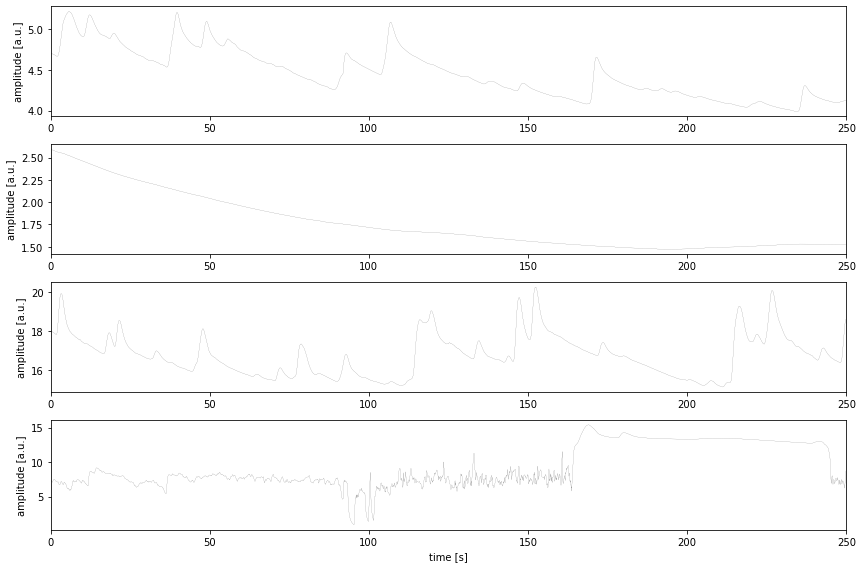

In [6]:
# fig:eda_morph 
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,8))
mytools.eda_subplot(ax1,cda1['time'],cda1['org'],color='black')
mytools.eda_subplot(ax2,cda2['time'],cda2['org'],color='black')
mytools.eda_subplot(ax3,cda3['time'],cda3['org'],color='black')
mytools.eda_subplot(ax4,cda4['time'],cda4['org'],color='black')
plt.xlabel('time [s]')
plt.tight_layout()

figpath = dir_figs + r'\eda\morph.pdf'
#plt.savefig(figpath,dpi=80)

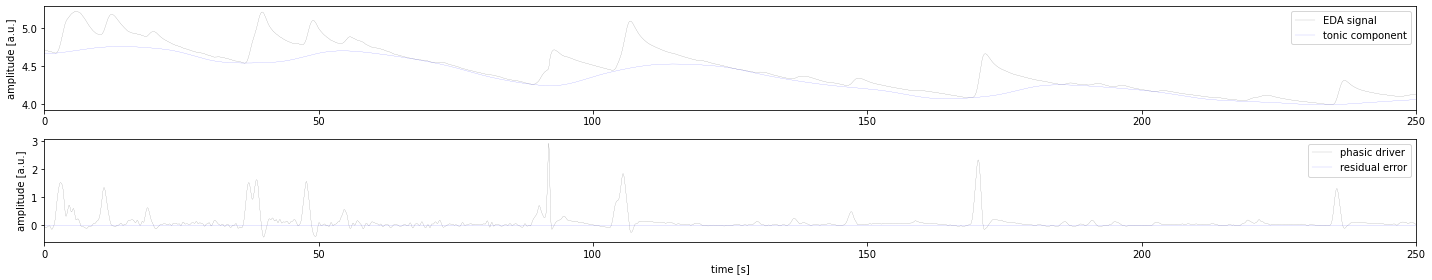

In [13]:
# fig:eda_cda
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,4))

mytools.eda_subplot(ax1,cda1['time'],cda1['org'],color='black',label='EDA signal')
mytools.eda_subplot(ax1,cda1['time'],cda1['tonic'],color='blue',label='tonic component')
ax1.legend()

mytools.eda_subplot(ax2,cda1['time'],cda1['driver'],color='black',label='phasic driver')
mytools.eda_subplot(ax2,cda1['time'],cda1['residual'],color='blue',label='residual error')
ax2.legend()

plt.xlabel('time [s]')
plt.tight_layout()

figpath = dir_figs + r'\eda\cda.pdf'
#plt.savefig(figpath,dpi=80)

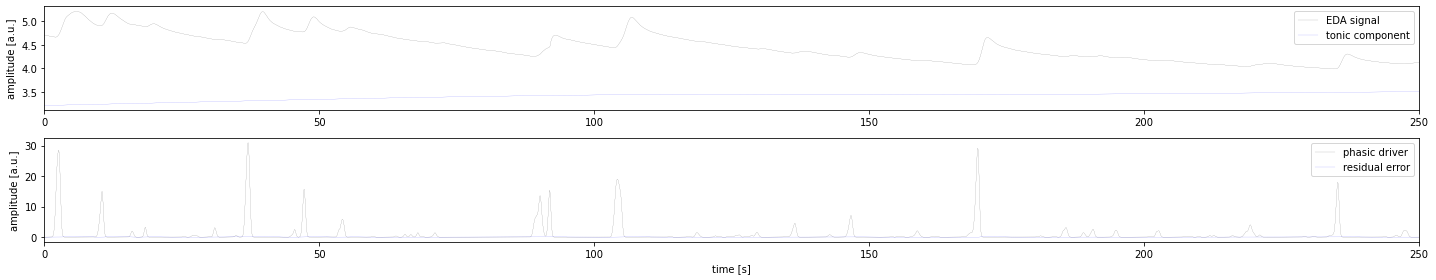

In [14]:
# fig:eda_dda
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,4))

mytools.eda_subplot(ax1,dda1['time'],dda1['org'],color='black',label='EDA signal')
mytools.eda_subplot(ax1,dda1['time'],dda1['tonic'],color='blue',label='tonic component')
#mytools.plot_impulses(dda1,ax1)
ax1.legend()

mytools.eda_subplot(ax2,dda1['time'],dda1['driver'],color='black',label='phasic driver')
mytools.eda_subplot(ax2,dda1['time'],dda1['residual'],color='blue',label='residual error')
ax2.legend()

plt.xlabel('time [s]')
plt.tight_layout()

figpath = dir_figs + r'\eda\dda.pdf'
#plt.savefig(figpath,dpi=80)

### 1.3 RSP
- frequent sighs (sudden deep breaths here and there)
- step/block envelope (shift in breathing amplitude)
- twin envelope (erratic breathing by patient)
- baseline shift/drift (motion artefact from belt)

In [3]:
dir_rsp_rawData = pjoin(dir_data,r'3_RSP\rsp_data\rsp_raw')        # before ..
dir_rsp_annData = pjoin(dir_data,r'3_RSP\rsp_data\rsp_annotated')  # after bandpass filter
dir_rsp_rawPng = pjoin(dir_data,r'3_RSP\rsp_figs\png_raw')         # inspection plots for raw rsp
dir_rsp_annPng = pjoin(dir_data,r'3_RSP\rsp_figs\png_annotated')   # inspection plots for annotated rsp

In [4]:
time,rsp,fs = mytools.get_rsp_raw(dir_rsp_rawData,'PP01_RS_PRE')
fixlength = 300 # seconds

#### Generate folder of inspection plots (.png)
- for minimally processed (raw) recordings (fixed length, nans removed, nothing else)
- for preprocessed and annotated recordings (BP filter, adaptive peak prominence thresholding)

In [13]:
select_file = pjoin(dir_data,r'filenames')
matfile = sio.loadmat(select_file,squeeze_me=True)
filenames = matfile['filenames']

#### Build report figures

In [5]:
mid1 = 'PP12_RS_PRE'
mid2 = 'PP15_RS_PRE'
mid3 = 'PP28_EYE_PRE'
mid4 = 'PP19_EYE_POST'

In [10]:
len(time4)

38400

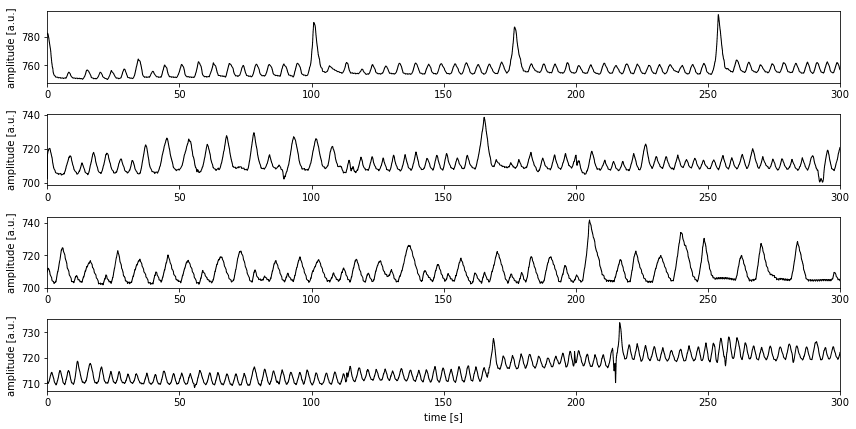

In [6]:
# fig:rsp_morph
apply_zscore = False
T = 300 # seconds
fs # collected from RSP raw import in earlier section (don't assume fixed value)

time1,rsp1,fs1 = mytools.get_rsp_raw(dir_rsp_rawData,mid1)
time2,rsp2,fs2 = mytools.get_rsp_raw(dir_rsp_rawData,mid2)
time3,rsp3,fs3 = mytools.get_rsp_raw(dir_rsp_rawData,mid3)
time4,rsp4,fs4 = mytools.get_rsp_raw(dir_rsp_rawData,mid4)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,6))
mytools.rsp_raw_subplot(ax1,time1,rsp1,T,fs,apply_zscore)
mytools.rsp_raw_subplot(ax2,time2,rsp2,T,fs,apply_zscore)
mytools.rsp_raw_subplot(ax3,time3,rsp3,T,fs,apply_zscore)
mytools.rsp_raw_subplot(ax4,time4,rsp4,T,fs,apply_zscore)

#plt.xlim(0,fixlength)
plt.xlabel('time [s]')
plt.tight_layout()

path_fig = pjoin(dir_figs,r'rsp\morph.pdf')
#plt.savefig(path_fig,dpi=80)

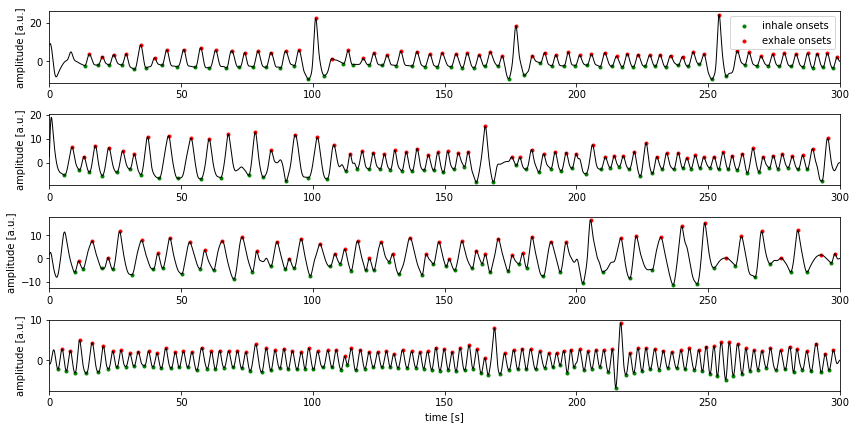

In [7]:
# fig:rsp_ann
# note: applies zscore by default

rsp1 = mytools.get_rsp(dir_rsp_annData,mid1) # fill in mids! TODO
rsp2 = mytools.get_rsp(dir_rsp_annData,mid2)
rsp3 = mytools.get_rsp(dir_rsp_annData,mid3)
rsp4 = mytools.get_rsp(dir_rsp_annData,mid4)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,6))
mytools.rsp_subplot(ax1,rsp1,fixlength)
mytools.rsp_subplot(ax2,rsp2,fixlength)
mytools.rsp_subplot(ax3,rsp3,fixlength)
mytools.rsp_subplot(ax4,rsp4,fixlength)

ax1.legend()
plt.xlabel('time [s]')
plt.tight_layout()

path_fig = pjoin(dir_figs,r'rsp\ann.pdf')
#plt.savefig(path_fig,dpi=80)

## 2. Process overview
block schematic for introductory paragraph of chapter 2

### 2.1 attempt with blockdiag: quite ugly but it works
using blockdiag package ([source](http://blockdiag.com/en/blockdiag/examples.html)) as demonstrated [here](http://www.xavierdupre.fr/app/pyensae/helpsphinx/notebooks/draw_diagram.html)

In [17]:
dir_tmp = pjoin(root,r'qssr_dvc\data\combi\blockdiag')
path_c1 = pjoin(dir_tmp,r'c1_blockdiag.png')
path_c2 = pjoin(dir_tmp,r'c2_blockdiag.png')

In [24]:
# updated version, add overarching labels here or in ppt if needed (c1_blockdiag.png)
source = """

            blockdiag {
                
                // layout settings
                default_shape = roundedbox;
                default_fontsize = 12;
                node_width = 100;
                //edge_layout = flowchart;
                default_group_color = lightgrey;
                
                group {
                    label="Signal modalities";
                    BVP [width=140, label="fingertip BVP"];
                    RSP [width=140, label="respiration belt"];
                    EDA [width=140, label="skin electrodes"];
                }
                
                group {
                    label="Signal processing";
                    
                    BVP_p  [label="preprocessing"]; 
                    RSP_p  [label="preprocessing"]; 
                    EDA_p  [label="preprocessing"]; 

                    BVP_a  [label="RDECO"];
                    RSP_a  [label="robust peak\ndetection"];
                    EDA_a1 [label="CDA (Ledalab)"];
                    EDA_a2 [label="DDA (Ledalab)"];
                }
                
                group {
                    label="Feature extraction";
                    BVP_f  [width=160, label="classical PRV\npower features"];
                    RSP_f  [width=160, label="respiratory variability\ntemporal features"];
                    EDA_f1 [width=160, label="skin conductance\ntonic and phasic trends"]
                    EDA_f2 [width=160, label="skin conductance\nresponse features"];
                }
                
                group {
                    label="Feature analysis";
                    orientation = portrait;
                    width=200;
                    
                    ftrA [width=140, label="collection"];
                    ftrB [width=140, label="preparation"];
                    ftrC [width=140, label="tests"];
                    ftrD [width=140, label="results"];
                }
                
                // connect all nodes
                BVP -> BVP_p -> BVP_a  -> BVP_f  -> ftrA;
                RSP -> RSP_p -> RSP_a  -> RSP_f  -> ftrA;
                EDA -> EDA_p;
                EDA_p -> EDA_a1 -> EDA_f1 -> ftrA;
                EDA_p -> EDA_a2 -> EDA_f2 -> ftrA;
                
                ftrA -> ftrB -> ftrC -> ftrD;
            }
        """

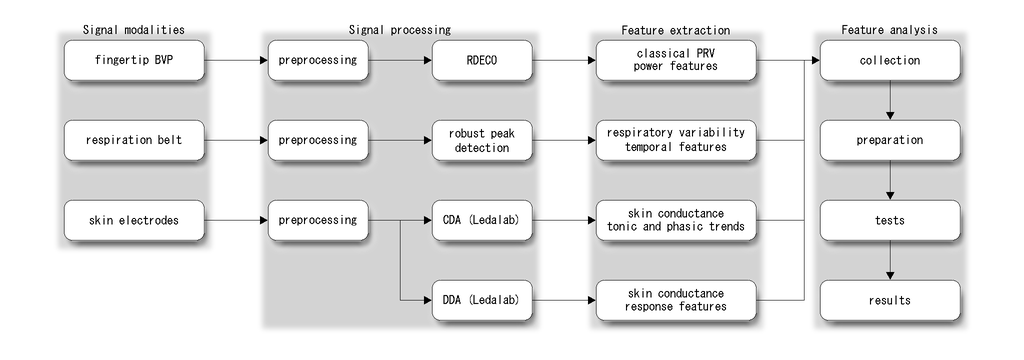

In [25]:
from pyensae.graphhelper import draw_diagram
img = draw_diagram(source)
img

In [27]:
from blockdiag import parser, builder, drawer
tree = parser.parse_string(source)
diagram = builder.ScreenNodeBuilder.build(tree)
draw = drawer.DiagramDraw('PNG', diagram, filename=path_c1)
draw.draw()
draw.save()

### 2.2 with bdp (python frontend for tikz)
https://pypi.org/project/bdp/
moved to dedicated notebook (texlive needed, best to use main env)